In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# import some data to play with
iris = pd.read_csv("D:/ANALYTIX/01_EXCELR/02_Deep Learning & AI/Day3/Part 2/Iris.csv")

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
iris['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
iris.shape

(150, 6)

In [7]:
iris = iris.drop('Id' , axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
#Complete Iris dataset

label_encoder = preprocessing.LabelEncoder()

iris['Species']= label_encoder.fit_transform(iris['Species']) 

In [10]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
iris.iloc[:,0:4]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
x=iris.iloc[:,0:4]
y=iris['Species']

In [13]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [14]:
iris['Species'].unique()

array([0, 1, 2])

In [15]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [16]:
x_train.shape, x_test.shape ,y_train.shape ,y_test.shape

((120, 4), (30, 4), (120,), (30,))

### Building Decision Tree Classifier using Entropy Criteria

In [17]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)

dt_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [18]:
dt_model.score(x_train,y_train)

1.0

In [19]:
dt_model.predict(x_test)

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [20]:
dt_model.score(x_test,y_test)

1.0

In [21]:
#PLot the decision tree
# tree.plot_tree(model)

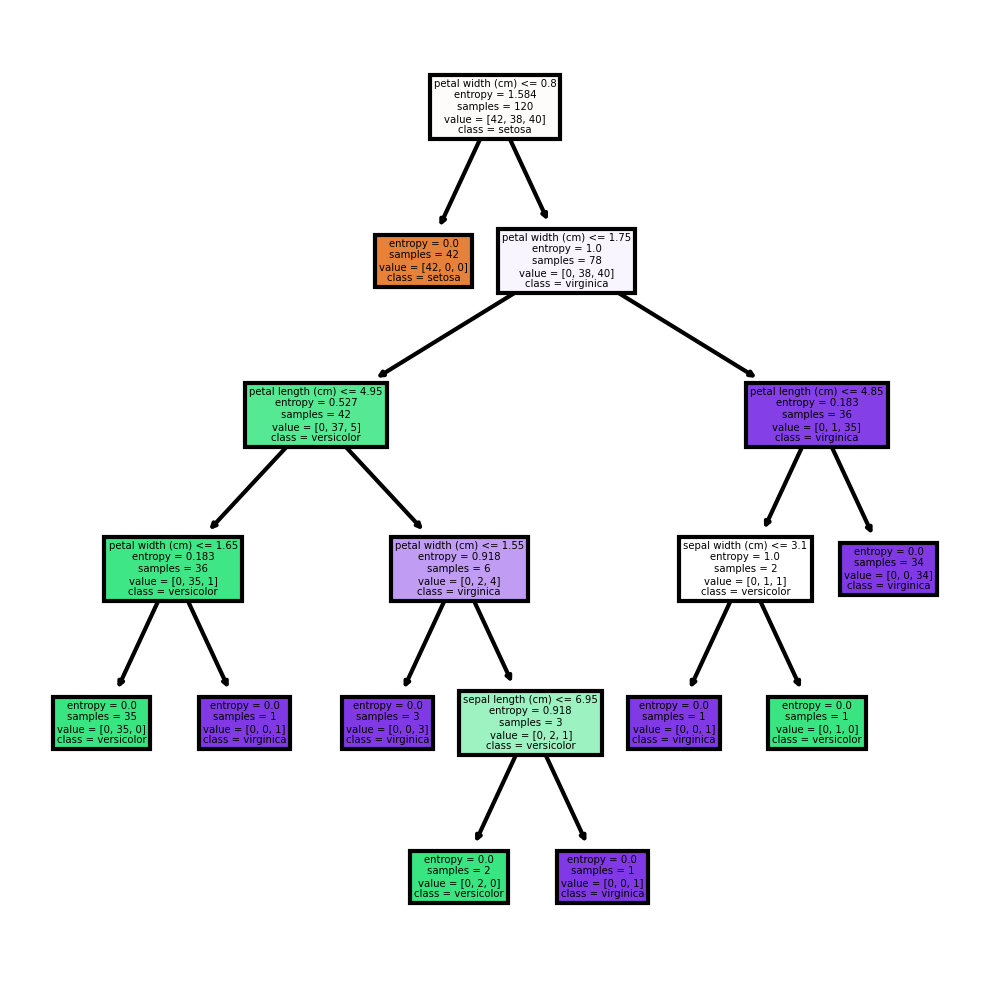

In [22]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [23]:
#Predicting on test data
preds = dt_model.predict(x_test) # predicting on test data set 
# pd.Series(preds).value_counts() # getting the count of each category 

In [24]:
preds

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [25]:
#pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [28]:
#print(confusion_matrix(y_test,preds))

In [53]:
### k-fold cross validation
# from sklearn.model_selection import cross_val_score
# results = cross_val_score(dt_model, x, y, cv=3)
# results

### Building Decision Tree Classifier (CART) using Gini Criteria

In [30]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [31]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [32]:
#Prediction and computing the accuracy
pred=model_gini.predict(x_test)

In [33]:
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
38,4.4,3.0,1.3,0.2
66,5.6,3.0,4.5,1.5
115,6.4,3.2,5.3,2.3
117,7.7,3.8,6.7,2.2
89,5.5,2.5,4.0,1.3
136,6.3,3.4,5.6,2.4
68,6.2,2.2,4.5,1.5
94,5.6,2.7,4.2,1.3
84,5.4,3.0,4.5,1.5
28,5.2,3.4,1.4,0.2


In [34]:
x_test.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [35]:
new_data = pd.DataFrame({'SepalLengthCm' : [5.09 , 4.7],
  'SepalWidthCm' : [1.987 , 3.005],
  'PetalLengthCm' : [2.59 , 1.68],
  'PetalWidthCm' : [1.7 , 0.423]})

In [36]:
new_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.09,1.987,2.59,1.700
1,4.70,3.005,1.68,0.423


In [37]:
dt_model.predict(new_data)

array([2, 0])

In [38]:
model_gini.predict(new_data)

array([1, 0])

In [39]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.92      1.00      0.96        12
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



#### Decision Tree Regression Example

In [40]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [41]:
array = iris.values
X = array[:,0:3]
y = array[:,3]

In [42]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [44]:
X_train.shape , X_test.shape

((120, 3), (30, 3))

In [45]:
model1 = DecisionTreeRegressor()
model1.fit(X_train, y_train)

DecisionTreeRegressor()

In [46]:
model1.score(X_train, y_train)

0.9984722151491442

In [47]:
model1.score(X_test,y_test)

0.8644143524883146

In [48]:
model1.predict(X_test)

array([0.1 , 1.  , 1.3 , 0.1 , 2.2 , 1.4 , 1.5 , 0.2 , 0.2 , 2.3 , 1.3 ,
       0.3 , 1.6 , 1.3 , 1.6 , 0.2 , 1.1 , 1.2 , 0.2 , 0.2 , 1.3 , 1.2 ,
       2.  , 0.25, 2.3 , 1.3 , 0.1 , 0.4 , 1.5 , 1.6 ])

In [54]:
# result1 = cross_val_score(model1, X, y, cv=5)
# result1

### Hyperparameter tuning for D.T.

In [50]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics

params_grid ={"max_depth" : [5,7,9,10,12,14,16,18],
               "min_samples_leaf" : range(2,10),
               "min_samples_split" : [4,8,10,12,15,18,20],
               "max_leaf_nodes" : range(4,21) }

dt_estimator = RandomizedSearchCV(DecisionTreeRegressor(random_state=0), param_distributions=params_grid, cv=10, random_state=0, n_jobs=-1)

dt_estimator.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 7, 9, 10, 12, 14, 16,
                                                      18],
                                        'max_leaf_nodes': range(4, 21),
                                        'min_samples_leaf': range(2, 10),
                                        'min_samples_split': [4, 8, 10, 12, 15,
                                                              18, 20]},
                   random_state=0)

In [51]:
dt_estimator.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_leaf_nodes': 19,
 'max_depth': 18}

In [52]:
y_pred_t = dt_estimator.predict(X_train)
rmse_t = np.sqrt( metrics.mean_squared_error( y_train, y_pred_t) )
print('dt_Train_RMSE:', rmse_t)
print('dt_Train_R2:', metrics.r2_score( y_train, y_pred_t ))

y_pred_test = dt_estimator.predict( X_test )
rmse = np.sqrt( metrics.mean_squared_error( y_test, y_pred_test ) )
print('dt_Test_RMSE: ',rmse)
print('dt_Test_R2: ',metrics.r2_score( y_test, y_pred_test ))

dt_Train_RMSE: 0.14477952586989332
dt_Train_R2: 0.9650646530770975
dt_Test_RMSE:  0.1739410244012771
dt_Test_R2:  0.9376089909889352
